In [1]:
import pandas as pd
import pandas_ta as ta
import mplfinance as mpf
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'C:\Users\zig53\vscode jupyther\Datasets\BTC-USD_6years.csv')

df['Datetime'] = pd.to_datetime(df['datetime'])
df.reset_index()
df = df.set_index('Datetime')
del df['datetime']
df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2190 entries, 2016-06-05 07:00:00 to 2022-06-10 07:00:00
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   symbol  2190 non-null   object 
 1   open    2190 non-null   float64
 2   high    2190 non-null   float64
 3   low     2190 non-null   float64
 4   close   2190 non-null   float64
 5   volume  2190 non-null   float64
dtypes: float64(5), object(1)
memory usage: 119.8+ KB


In [3]:
rsi = pd.DataFrame(ta.rsi(df['close'], length = 14))

df = pd.concat([df, rsi], axis = 1)
df.rename({'RSI_14':'rsi'}, inplace = True, axis = 1)
df

,symbol,open,high,low,close,volume,rsi
Datetime,,,,,,,
2016-06-05 07:00:00,BITFINEX:BTCUSD,573.08,586.470000,564.64,574.020000,28143.301081,NaN
2016-06-06 07:00:00,BITFINEX:BTCUSD,574.01,588.600000,573.93,585.340000,27464.294823,NaN
2016-06-07 07:00:00,BITFINEX:BTCUSD,585.59,592.080000,561.30,576.880000,36112.753034,NaN
2016-06-08 07:00:00,BITFINEX:BTCUSD,577.23,585.150000,570.62,583.050000,18084.176162,NaN
2016-06-09 07:00:00,BITFINEX:BTCUSD,583.26,584.050000,569.97,575.520000,21873.892421,NaN
...,...,...,...,...,...,...,...
2022-06-06 07:00:00,BITFINEX:BTCUSD,29934.00,31775.000000,29907.00,31371.832115,4782.517908,51.347354
2022-06-07 07:00:00,BITFINEX:BTCUSD,31333.00,31591.000000,29174.00,31137.000000,6349.121404,50.283501
2022-06-08 07:00:00,BITFINEX:BTCUSD,31138.00,31339.000000,29872.00,30226.000000,2636.997604,46.277772


In [4]:

df['shift_rsi'] = df['rsi'].shift(1)

df.loc[df['rsi'] < 30, 'action' ] = 'buy'
df.loc[df['rsi'] > 70,'action'] = 'sell'

df[df['action'].notna()]

,symbol,open,high,low,close,volume,rsi,shift_rsi,action
Datetime,,,,,,,,,
2016-06-19 07:00:00,BITFINEX:BTCUSD,757.630000,775.00,739.00,767.30,26699.530996,80.831108,NaN,sell
2016-06-20 07:00:00,BITFINEX:BTCUSD,767.310000,767.77,721.00,743.90,46264.535755,72.198418,80.831108,sell
2016-08-13 07:00:00,BITFINEX:BTCUSD,585.500000,590.02,582.00,583.73,6420.322837,29.877488,30.279137,buy
2016-08-14 07:00:00,BITFINEX:BTCUSD,583.730000,583.75,564.00,569.41,7530.309042,26.782180,29.877488,buy
2016-08-15 07:00:00,BITFINEX:BTCUSD,569.650000,575.75,562.99,564.64,7650.169517,25.822517,26.782180,buy
...,...,...,...,...,...,...,...,...,...
2022-05-09 07:00:00,BITFINEX:BTCUSD,34075.000000,34277.00,30100.00,30140.00,21250.245615,24.555595,31.828770,buy
2022-05-10 07:00:00,BITFINEX:BTCUSD,30136.000000,32687.00,29833.00,31072.00,14172.682208,28.721726,24.555595,buy
2022-05-11 07:00:00,BITFINEX:BTCUSD,31065.327593,32227.00,27900.00,29149.00,28729.965053,25.582665,28.721726,buy


c:\Users\zig53\anaconda3\lib\site-packages\mplfinance\_arg_validators.py:36: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


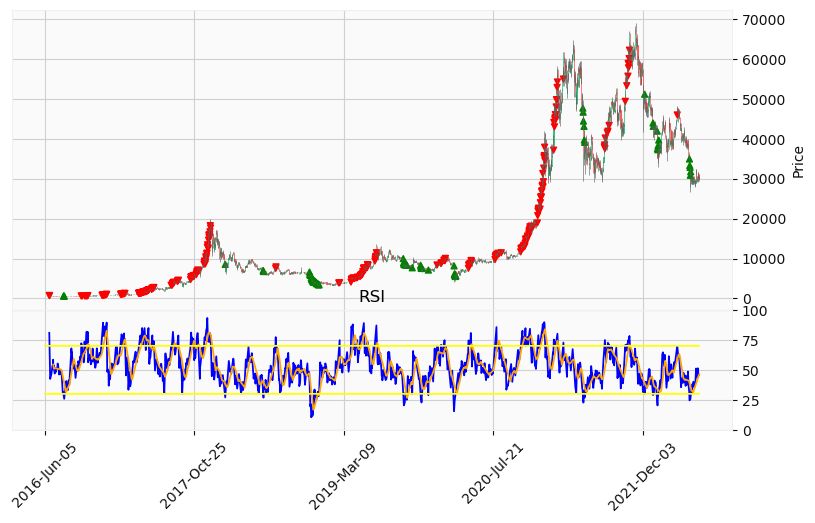

In [5]:
### It's all about plot
    #Let's Vizualised 
   # ทำ addplot ก่อนแล้วค่อยเรียกทีเดียวเหมือนวาดรูปเล็กไปกระกอบใส่ในรูปใหญ่
rsi_ylim = (0,100)
df['lower'] = 30
df['upper'] = 70
rsi_mpf = mpf.make_addplot(df['rsi'], panel = 1 , color = 'blue', title = 'RSI', ylim = rsi_ylim)

rsi_sma_mpf = mpf.make_addplot(df['rsi'].rolling(window = 14).mean(), panel = 1, color = 'orange', ylim = rsi_ylim)

rsi_lower_band = mpf.make_addplot(df['lower'], panel = 1, color = 'yellow', ylim = rsi_ylim)

rsi_upper_band = mpf.make_addplot(df['upper'], panel = 1, color = 'yellow', ylim = rsi_ylim)



#Signal's Plot 
    # Markers

markers = ['^' if i == 'buy' else 'v' for i in df['action']]
marker_colors = ['green' if i == 'buy' else 'red' for i in df['action']]
    #make marker's position
df.loc[df['action'] == 'buy','marker_positions'] = df['high'] * 1.02
df.loc[df['action'] == 'sell', 'marker_positions'] =  df['low'] * 0.98

bs_signal = mpf.make_addplot(df['marker_positions'], type = 'scatter', marker = markers, color = marker_colors )

adds = [bs_signal, rsi_mpf, rsi_sma_mpf, rsi_lower_band,rsi_upper_band]

#Let's Plot

mpf.plot(df , type = 'candle', style = 'yahoo' , figsize = (10,6), addplot = adds)






จะเห็นได้ว่ามีปัญหาเรื่อง ซื้อๆๆๆๆๆๆๆๆ ขายๆๆๆๆๆๆๆๆ


In [6]:
#Let's make signal

action_data = df.copy()

action_data['action_price'] = action_data['open'].shift(-1)
action_data.

,symbol,open,high,low,close,volume,rsi,shift_rsi,action,lower,upper,marker_positions,action_price
Datetime,,,,,,,,,,,,,
2016-06-05 07:00:00,BITFINEX:BTCUSD,573.08,586.47,564.64,574.02,28143.301081,NaN,NaN,NaN,30,70,NaN,574.01
2016-06-06 07:00:00,BITFINEX:BTCUSD,574.01,588.60,573.93,585.34,27464.294823,NaN,NaN,NaN,30,70,NaN,585.59
2016-06-07 07:00:00,BITFINEX:BTCUSD,585.59,592.08,561.30,576.88,36112.753034,NaN,NaN,NaN,30,70,NaN,577.23
2016-06-08 07:00:00,BITFINEX:BTCUSD,577.23,585.15,570.62,583.05,18084.176162,NaN,NaN,NaN,30,70,NaN,583.26
2016-06-09 07:00:00,BITFINEX:BTCUSD,583.26,584.05,569.97,575.52,21873.892421,NaN,NaN,NaN,30,70,NaN,575.52


In [7]:
record = action_data[action_data['action'].notnull()]
record['helper'] = record['action'].shift(-1)

C:\Users\zig53\AppData\Local\Temp\ipykernel_7724\630529890.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  record['helper'] = record['action'].shift(-1)


In [8]:
##helper is dummy to make buy-sell สลับกัน
record = record.loc[record['helper'] != record['action']]
record = record.iloc[1:]
record

,symbol,open,high,low,close,volume,rsi,shift_rsi,action,lower,upper,marker_positions,action_price,helper
Datetime,,,,,,,,,,,,,,
2016-08-15 07:00:00,BITFINEX:BTCUSD,569.650000,575.750000,562.990000,564.640000,7650.169517,25.822517,26.782180,buy,30,70,587.265000,564.550000,sell
2017-12-18 07:00:00,BITFINEX:BTCUSD,18956.000000,19175.000000,18010.000000,18928.000000,53568.506047,78.277566,78.545151,sell,30,70,17649.800000,18924.000000,buy
2018-06-13 07:00:00,BITFINEX:BTCUSD,6543.900000,6611.700000,6107.877185,6295.100000,45577.581862,26.817437,29.420999,buy,30,70,6743.934000,6295.000000,sell
2018-07-25 07:00:00,BITFINEX:BTCUSD,8389.900000,8488.100000,8073.000000,8178.400000,36972.150777,71.307336,77.226773,sell,30,70,7911.540000,8175.600000,buy
2018-12-16 07:00:00,BITFINEX:BTCUSD,3282.300000,3383.000000,3276.200000,3301.500000,19106.477004,28.760828,28.024333,buy,30,70,3450.660000,3300.100000,sell
2019-06-26 07:00:00,BITFINEX:BTCUSD,11737.000000,13764.000000,11684.450463,12876.000000,55127.706888,86.983686,83.116299,sell,30,70,11450.761453,12876.000000,buy
2019-12-17 07:00:00,BITFINEX:BTCUSD,6926.800000,6972.000000,6620.000000,6667.100000,12656.313323,28.932911,33.282027,buy,30,70,7111.440000,6667.068103,sell
2020-02-12 07:00:00,BITFINEX:BTCUSD,10247.000000,10460.000000,10238.000000,10338.000000,8707.360851,71.702361,70.650371,sell,30,70,10033.240000,10338.000000,buy
2020-03-18 07:00:00,BITFINEX:BTCUSD,5339.100000,5487.963668,5033.000000,5416.200000,21127.200192,29.592113,28.551833,buy,30,70,5597.722942,5417.000000,sell


In [9]:

record['return'] = record['action_price'].pct_change()
record.head()

# select return when sell complete

,symbol,open,high,low,close,volume,rsi,shift_rsi,action,lower,upper,marker_positions,action_price,helper,return
Datetime,,,,,,,,,,,,,,,
2016-08-15 07:00:00,BITFINEX:BTCUSD,569.65,575.75,562.990000,564.64,7650.169517,25.822517,26.782180,buy,30,70,587.265,564.55,sell,NaN
2017-12-18 07:00:00,BITFINEX:BTCUSD,18956.00,19175.00,18010.000000,18928.00,53568.506047,78.277566,78.545151,sell,30,70,17649.800,18924.00,buy,32.520503
2018-06-13 07:00:00,BITFINEX:BTCUSD,6543.90,6611.70,6107.877185,6295.10,45577.581862,26.817437,29.420999,buy,30,70,6743.934,6295.00,sell,-0.667354
2018-07-25 07:00:00,BITFINEX:BTCUSD,8389.90,8488.10,8073.000000,8178.40,36972.150777,71.307336,77.226773,sell,30,70,7911.540,8175.60,buy,0.298745
2018-12-16 07:00:00,BITFINEX:BTCUSD,3282.30,3383.00,3276.200000,3301.50,19106.477004,28.760828,28.024333,buy,30,70,3450.660,3300.10,sell,-0.596348


In [10]:
record.reset_index(inplace=True)

In [11]:
record['previous_sig_date'] = record['Datetime'].shift(1)
record['previous_action'] = record['action'].shift(1)
record['previous_act_price'] = record['action_price'].shift(1)
record.rename(columns={'Datetime':'today_sig_date'}, inplace=True)

record

,today_sig_date,symbol,open,high,low,close,volume,rsi,shift_rsi,action,lower,upper,marker_positions,action_price,helper,return,previous_sig_date,previous_action,previous_act_price
0,2016-08-15 07:00:00,BITFINEX:BTCUSD,569.650000,575.750000,562.990000,564.640000,7650.169517,25.822517,26.782180,buy,30,70,587.265000,564.550000,sell,NaN,NaT,NaN,NaN
1,2017-12-18 07:00:00,BITFINEX:BTCUSD,18956.000000,19175.000000,18010.000000,18928.000000,53568.506047,78.277566,78.545151,sell,30,70,17649.800000,18924.000000,buy,32.520503,2016-08-15 07:00:00,buy,564.550000
2,2018-06-13 07:00:00,BITFINEX:BTCUSD,6543.900000,6611.700000,6107.877185,6295.100000,45577.581862,26.817437,29.420999,buy,30,70,6743.934000,6295.000000,sell,-0.667354,2017-12-18 07:00:00,sell,18924.000000
3,2018-07-25 07:00:00,BITFINEX:BTCUSD,8389.900000,8488.100000,8073.000000,8178.400000,36972.150777,71.307336,77.226773,sell,30,70,7911.540000,8175.600000,buy,0.298745,2018-06-13 07:00:00,buy,6295.000000
4,2018-12-16 07:00:00,BITFINEX:BTCUSD,3282.300000,3383.000000,3276.200000,3301.500000,19106.477004,28.760828,28.024333,buy,30,70,3450.660000,3300.100000,sell,-0.596348,2018-07-25 07:00:00,sell,8175.600000
5,2019-06-26 07:00:00,BITFINEX:BTCUSD,11737.000000,13764.000000,11684.450463,12876.000000,55127.706888,86.983686,83.116299,sell,30,70,11450.761453,12876.000000,buy,2.901700,2018-12-16 07:00:00,buy,3300.100000
6,2019-12-17 07:00:00,BITFINEX:BTCUSD,6926.800000,6972.000000,6620.000000,6667.100000,12656.313323,28.932911,33.282027,buy,30,70,7111.440000,6667.068103,sell,-0.482210,2019-06-26 07:00:00,sell,12876.000000
7,2020-02-12 07:00:00,BITFINEX:BTCUSD,10247.000000,10460.000000,10238.000000,10338.000000,8707.360851,71.702361,70.650371,sell,30,70,10033.240000,10338.000000,buy,0.550607,2019-12-17 07:00:00,buy,6667.068103
8,2020-03-18 07:00:00,BITFINEX:BTCUSD,5339.100000,5487.963668,5033.000000,5416.200000,21127.200192,29.592113,28.551833,buy,30,70,5597.722942,5417.000000,sell,-0.476011,2020-02-12 07:00:00,sell,10338.000000
9,2021-03-13 07:00:00,BITFINEX:BTCUSD,57293.000000,61693.000000,56130.000000,61202.887014,13700.241184,72.719421,67.504249,sell,30,70,55007.400000,61203.000000,buy,10.298320,2020-03-18 07:00:00,buy,5417.000000


,action,today_sig_date,action_price,return,previous_sig_date,previous_action,previous_act_price
1,sell,2017-12-18 07:00:00,18924.000000,32.520503,2016-08-15 07:00:00,buy,564.550000
3,sell,2018-07-25 07:00:00,8175.600000,0.298745,2018-06-13 07:00:00,buy,6295.000000
5,sell,2019-06-26 07:00:00,12876.000000,2.901700,2018-12-16 07:00:00,buy,3300.100000
7,sell,2020-02-12 07:00:00,10338.000000,0.550607,2019-12-17 07:00:00,buy,6667.068103
9,sell,2021-03-13 07:00:00,61203.000000,10.298320,2020-03-18 07:00:00,buy,5417.000000
11,sell,2021-10-20 07:00:00,66021.000000,0.900049,2021-05-23 07:00:00,buy,34747.000000
13,sell,2022-03-29 07:00:00,47423.969082,0.287028,2022-01-26 07:00:00,buy,36847.647615


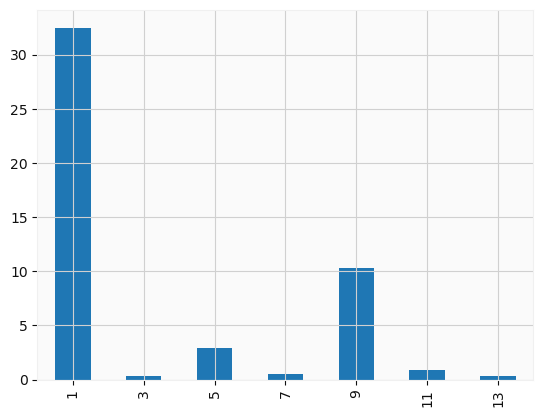

In [12]:
record = record[['action','today_sig_date','action_price','return','previous_sig_date','previous_action','previous_act_price']]
profit = record[record.action == 'sell']
profit = record[record.action == 'sell']
profit['return'].plot(kind='bar')
profit